In [2]:

!pip install -q kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahid09092005","key":"d4dd1ebbb2860e4731f20f7fea24b383"}'}

In [4]:
#Copy the kaggle.json to created folder
!/content/kaggle.json ~/.kaggle/

#permisson for the json to act
! chmod 600 /content/kaggle.json ~/.kaggle/

/bin/bash: line 1: /content/kaggle.json: Permission denied
chmod: cannot access '/root/.kaggle/': No such file or directory


In [5]:
!kaggle datasets download -d d4rklucif3r/social-network-ads

Dataset URL: https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads
License(s): Community Data License Agreement - Permissive - Version 1.0
  0% 0.00/1.46k [00:00<?, ?B/s]
100% 1.46k/1.46k [00:00<00:00, 3.32MB/s]


In [6]:
!unzip /content/social-network-ads.zip

Archive:  /content/social-network-ads.zip
  inflating: Social_Network_Ads.csv  


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [10]:
df.sample(5)

,Age,EstimatedSalary,Purchased
233,49,86000,1
156,46,59000,0
317,35,55000,0
307,47,113000,1
81,39,42000,0


**Train Test Split**

train_test_split function used to split the data into training and testing set

train_test_split focus on that column you want to predict,know as target variable .
in this dataset age and salary are the feature and 'purchase' is a target variable
(use copy for more imformation)

In [14]:
from sklearn.model_selection import train_test_split  #importing the module
x_train , x_test , y_train , y_test = train_test_split(
    df.drop('Purchased' , axis=1),
    df['Purchased'], test_size=0.3,
    random_state=0 )

In [15]:
x_train.shape , x_test.shape

((280, 2), (120, 2))

**Standard Scale**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set
scaler.fit(x_train)   #learning the values from x_train.  it means it store the value of mean and standard deviation

#Transform train and test set
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)


In [25]:
scaler.mean_ # it will give the mean of each column

array([3.78642857e+01, 6.98071429e+04])

In [21]:
scaler.scale_ # it will give the standard deviation (S.D) of each colum

array([1.01999375e+01, 3.45792870e+04])

NOTE: after transform the dataframe will get the dataframe as numpy array

In [30]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [36]:
round(x_train.describe())  #here mean is not 0 and std is not 1 because it is not scaled

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [37]:
round(x_train_scaler.describe()) #here mean is 0 and std is 1 because after applying the transform scaler

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


**Effect of Scaling**

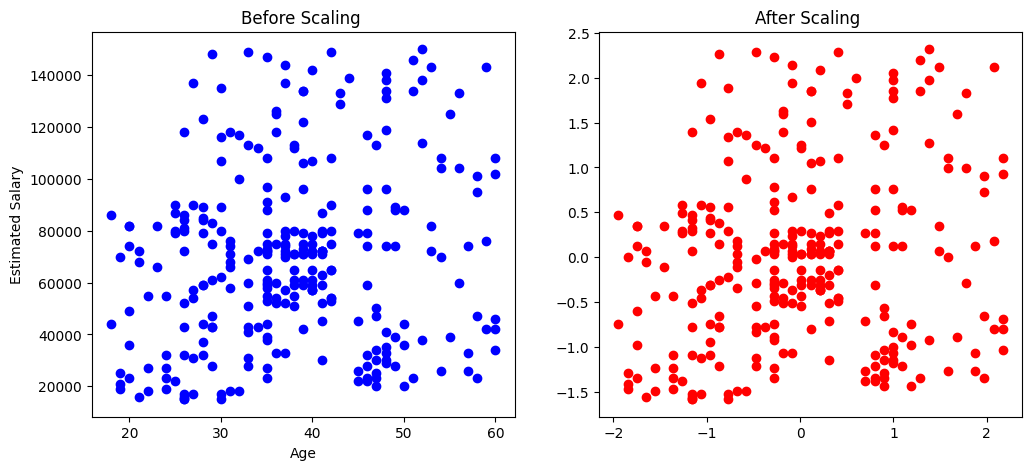

In [43]:
# fig represents the entire figure.
# ax1 and ax2 represent the two subplots.
# The scatter and set_title methods are called on ax1 and ax2 respectively to plot and set titles for each subplot.
fig , (ax1,ax2) = plt.subplots( ncols=2 , figsize = (12 , 5) )

ax1.scatter( x = x_train['Age'] , y = x_train['EstimatedSalary'],color='blue')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.set_title('Before Scaling ')
ax2.scatter(x_train_scaler['Age'] , x_train_scaler['EstimatedSalary'],color='red')
ax2.set_title('After Scaling ')

plt.show()

ploting by kdeplot in Seaborn stands for Kernel Density Estimate plot.

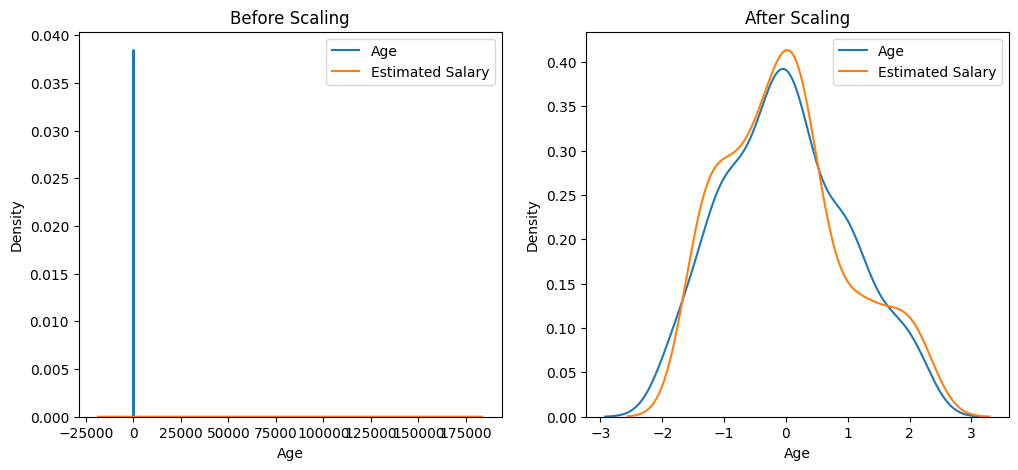

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1, label='Age')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, label='Estimated Salary')
ax1.legend()  # Add legend to differentiate the KDE plots

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaler['Age'], ax=ax2, label='Age')
sns.kdeplot(x_train_scaler['EstimatedSalary'], ax=ax2, label='Estimated Salary')
ax2.legend()  # Add legend to differentiate the KDE plots

plt.show()


**Why Scaling is importand**

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaler=LogisticRegression()

fit method of the logistic regression model requires two arguments:

The feature data (x_train_scaler), which are the independent variables.
The target data (y_train), which are the dependent variables or labels.

In [61]:
lr.fit(x_train,y_train)    # # Fit the model on the original training data
lr_scaler.fit(x_train_scaler,y_train)  # # Fit the model on the scaled training data
#here x_train_scaler is a feature with scale dataset

LogisticRegression()

In [62]:
y_pred=lr.predict(x_test)
y_pred_scaler=lr_scaler.predict(x_test_scaler)

In [60]:
from sklearn.metrics import accuracy_score
print("Actual ",accuracy_score(y_test , y_pred))
print("Scale ",accuracy_score(y_test , y_pred_scaler))

Actual  0.6583333333333333
Scale  0.8666666666666667
